In [1]:
import glob 
import shutil
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

In [2]:
files = glob.glob('rain00/*')
len(files)

In [5]:
rm_list = []
for i in range(len(files)):
    if files[i][7:9] != 'MI':
        #files.remove(files[i])
        rm_list.append(files[i])

In [6]:
for f in rm_list:
    files.remove(f)

In [7]:
files

['rain00/MI_4027_3864_220.png.npy',
 'rain00/MI_2504_2839_320.png.npy',
 'rain00/MI_4019_3616_327.png.npy',
 'rain00/MI_3389_3210_106.png.npy',
 'rain00/MI_3500_3378_285.png.npy',
 'rain00/MI_3402_3305_106.png.npy',
 'rain00/MI_4009_3625_323.png.npy',
 'rain00/MI_3502_3279_280.png.npy',
 'rain00/MI_3928_3745_40.png.npy',
 'rain00/MI_3387_3204_95.png.npy',
 'rain00/MI_3106_3384_155.png.npy',
 'rain00/MI_3094_3974_267.png.npy',
 'rain00/MI_3929_3741_143.png.npy',
 'rain00/MI_3503_4097_255.png.npy',
 'rain00/MI_4028_3563_222.png.npy',
 'rain00/MI_4064_3474_218.png.npy',
 'rain00/MI_3097_4025_262.png.npy',
 'rain00/MI_4061_3470_218.png.npy',
 'rain00/MI_4026_3617_314.png.npy',
 'rain00/MI_3500_3385_107.png.npy',
 'rain00/MI_4038_3677_52.png.npy',
 'rain00/MI_4010_3379_227.png.npy',
 'rain00/MI_3102_4023_79.png.npy',
 'rain00/MI_4059_3700_78.png.npy',
 'rain00/MI_4018_3868_100.png.npy',
 'rain00/MI_3106_4006_95.png.npy',
 'rain00/MI_4054_3440_220.png.npy',
 'rain00/MI_4128_3705_277.png.npy'

In [5]:
from PIL import Image

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import numpy as np

In [8]:
list_img = []
depth = glob.glob('./depth_needed/*')
for i in range(len(depth)):
    list_img.append(depth[i].replace('./depth_needed/', ''))

In [46]:
oc = './occlusion_map/'  # Occlusion map directory
de = './depth_needed/'   # Depth directory
pr = './vis/raw_segmentation_results/' 
la = './rain00/AL_'

In [47]:
level_occ = np.array([ 0.2, 0.4, 0.6, 0.8, 1.0]) # 0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8, 0.8-1.0
level_dep = np.array([5., 10., 15., 20., 25.])
thres = np.array([0.0, 0.2, 0.4, 0.6, 0.8 , 1.0])
dict_seg = {}
#list_dep = []
for image in list_img:
    npy = image.replace('.png','.npy')
    print (image)
    read_occ = np.load(oc + npy)/100.
    #print read_occ
    read_MI = np.load(la + image + '.npy')
    read_dep = np.asarray(Image.open(de + image))[:,:,0]
    print (np.unique(read_dep))
    #read_pre = np.asarray(Image.open(pr + image))
    
    read_MI = read_MI[read_occ > 0.0]
    read_dep = read_dep[read_occ > 0.0]
    read_occ = read_occ[read_occ > 0.0]
    
    occ_dig = np.digitize(read_occ, level_occ, right=True) 
    dep_dig = np.digitize(read_dep, level_dep, right=True) 
    #print read_occ
    #
    for index in range(len(read_MI)):
        o = occ_dig[index]
        d = dep_dig[index]
        name = str(o) + str(d)
        if not name in dict_seg:
            dict_seg[name] = [[], []]
            dict_seg[name][0].append(read_MI[index])
            #dict_seg[name][1].append(read_pre[index])
        else:
            dict_seg[name][0].append(read_MI[index])
            #dict_seg[name][1].append(read_pre[index])
        #print name
    print (np.unique(read_dep))

2531_3199_261.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111
 112 117 118 119 127 128 129 130 131 132 133 134 141 142 143 144 145 146
 147 148 149 150 151 152 153 155 169 170 171 172 173 191 220 221 222 223
 224 225 226 227 229 230 239 255]
[ 3  4  5 18 19 20]
2521_3721_104.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  91  92  93  96
  97  98 107 108 109 110 111 112 113 114 115 116 117 118 119 143 159 160
 163 166 255]
[ 8  9 10 11 12 13]
3937_3997_153.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  49  50  51  52  54  55  56  57  59  60  61  62
  63  64  65  67  68  70  75  76  81  82  83  84  87  88 105 106 107 255]
[ 1  2 21 22 23 24]
4100_3500_39.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 153 154 159 160 161 162 182 183 188 232 255]
[ 2  4  5  6  8  9 10]
3106_4006_95.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 128 129
 133 137 138 139 140 141 142 143 144 145 146 147 148 149 150 152 154 155
 156 171 194 198 199 200 201 204 205 206 207 208 209 210 211 214 215 216
 217 218 219 255]
[ 5  6  8  9 17 18 23 24]
4022_3556_228.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  73  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 158 159 160 161 162 163 164
 166 167 168 170 171 172 173 175 179 185 255]
[ 6  7  8  9 10 16 17 18 19]
3102_4023_79.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  82  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 124 127 128 129 130 132 133 134 135
 136 137 138 139 140 141 142 143 147 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 173 174 208 239 240 241 242 243 244 255]
[16 17 18 19 20 21 22]
2772_3419_51.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  29  30  31  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 130 131 132 145 158 232 255]
[ 2  4  5  6 10 11 17 18 19 20 23 24 25]
4121_4009_271.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  48  49  51  52  57  60  61  64
  65  68  69  71  72  76  77  79  81  82  83 126 255]
[3 4]
2584_2818_280.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 147 149
 150 151 154 155 156 157 158 159 160 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 180 181 182 183 184 185 186 192 200 222 223 225
 226 229 249 250 255]
[ 5  6  8  9 13 15]
2535_3693_99.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 142 143 144
 145 146 147 149 150 151 152 153 154 155 156 157 159 160 162 170 171 172
 244 255]
[14 15]
2561_3431_179.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  41  42  43  45  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  7

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  89  90  94  95  96
 104 105 107 108 109 115 116 117 118 119 120 121 122 123 124 125 126 128
 129 131 132 133 135 136 137 138 140 141 144 146 183 184 186 187 195 229
 230 240 242 245 255]
[ 4  5 18 19]
2504_2839_320.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 1

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 104 105 106 107 108 109
 110 111 112 113 114 115 117 118 119 122 124 126 127 130 131 133 134 135
 136 137 138 139 141 142 143 145 147 149 150 152 153 154 155 156 160 171
 172 174 188 189 197 255]
[ 7  8  9 15 16 18 21 22]
3107_3217_44.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  81  82  83  84  85  86  8

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  64  65  66  67  70  71  72  73  76  77
  78  79  80  81  83  84  85  88  94  95  96  97  98  99 100 102 103 104
 105 108 110 118 120 138 139 143 144 145 151 152 153 154 155 157 158 159
 177 180 204 205 206 207 223 255]
[ 1  2  5  6  7  8 13 14 23 24]
2559_3194_175.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 118 119 120 121 122 123 126 129 130 131 132 133 134 137
 138 139 140 141 142 143 144 145 146 147

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 161 167 168 173 174 175 176 193 201
 208 220 255]
[ 2  3  4  8  9 10]
4008_3378_36.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  71  72


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111
 112 113 115 117 121 122 123 124 125 126 128 129 130 134 135 136 137 138
 139 140 141 142 143 149 154 174 255]
[ 2  3  4  6  7 14 15 18 20]
2550_4112_188.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  9

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  55  59  61  62  63  64  65  71  72  73  74  75
 255]
[ 8 10 11]
2570_3039_357.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 137 138 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 165 175 187 209 210 211 212 213 214
 215 216 217 218 219 222 223 224 225 226 227 228 229 255]
[ 5  6  9 10 11 12 13 14 18 19 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  37
  38  39  40  41  42  53  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 103 104 105 106 107 113 114 115 116 117 119 120 122 123 125 127
 137 176 177 178 179 180 181 182 200 201 202 203 204 205 207 209 210 211
 212 213 214 215 216 217 218 219 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 242 243 244 249 255]
[ 4  5  7  8 11 12 13 21 23]
3395_4032_80.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  60  61  62  63  64  65  66  67  68  69  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  96  98  99 100 105 108 113 114 116 117 120 121 122 123 124
 127 131 134 138 139 142 147 150

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  70  71  84  86  87  92  93  94  95  96  97
  98  99 100 101 114 243 244 245 246 247 248 249 250 251 253 254 255]
[ 3  4  5 10 11 18 19]
2561_3108_170.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108 109
 111 112 113 116 117 120 121 122 123 124 125 128 129 130 131 132 135 143
 144 149 150 152 153 154 155 156 157 158 255]
[ 4  5  6 10 11 12 15 16 19]
4116_3718_2

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  79  80  84  87  88  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 112 113 114 115 116
 121 122 123 124 125 126 127 128 129 130 133 134 255]
[ 1  2  3  4 16 17]
2586_3729_110.png
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  97  99 100 101 102 103 105 106 107 108 109 110
 111 112 113 114 115 116 117 118

In [48]:
dict_seg['23'][0]

[0.8828917,
 0.9858881,
 1.0609887,
 1.0943007,
 1.0737762,
 1.0472956,
 1.0159744,
 0.9811354,
 0.90779614,
 0.93626183,
 0.9678589,
 1.0002587,
 0.9965081,
 0.9935662,
 0.9915309,
 0.99051666,
 0.88691276,
 0.78580177,
 0.69072884,
 0.6039515,
 0.63197225,
 0.6687519,
 0.7137234,
 0.76584923,
 1.0372038,
 1.208219,
 1.2037997,
 1.0762061,
 1.023629,
 0.9807282,
 0.9514229,
 0.93908954,
 1.032339,
 0.49905282,
 0.49476063,
 0.5007335,
 0.5179266,
 0.5562187,
 0.60248274,
 0.6571829,
 0.7202966,
 0.7718203,
 0.82661545,
 0.88398385,
 0.9429386,
 0.8977455,
 0.854674,
 0.8136129,
 0.7745075,
 0.79465616,
 0.8206962,
 0.85212606,
 0.88797116,
 1.0472184,
 1.1687164,
 1.2276049,
 1.2169951,
 1.2314749,
 1.2496203,
 1.2726134,
 1.301958,
 1.2415446,
 1.078299,
 0.8823438,
 0.70779836,
 0.6584999,
 0.61304706,
 0.5720292,
 0.5358642,
 0.56287384,
 0.5945696,
 0.63089556,
 0.67158324,
 0.82941467,
 1.009234,
 1.2067895,
 1.4141763,
 1.3611504,
 1.3012925,
 1.2209655,
 1.1142433,
 1.1357993,


In [49]:
result = {}
for key in dict_seg.keys():
    lll = np.array(dict_seg[key][0])
    result[key] = lll.mean()

In [50]:
result

{'00': 0.22511935,
 '01': 0.34609243,
 '02': 0.47045428,
 '03': 0.5068839,
 '04': 0.56046885,
 '10': 0.057396643,
 '11': 0.23115946,
 '12': 0.3778177,
 '13': 0.46444973,
 '14': 0.53443414,
 '20': 0.11517436,
 '21': 0.195514,
 '22': 0.32596004,
 '23': 0.2729308,
 '24': 0.42841426,
 '30': 0.04741553,
 '31': 0.1378999,
 '32': 0.19310418,
 '33': 0.31102362,
 '34': 0.35739762,
 '40': 0.058570176,
 '41': 0.1198936,
 '42': 0.2140655,
 '43': 0.29626966,
 '44': 0.4367949}

In [51]:
x = [0, 1 , 2 , 3 , 4]
y =  [0, 1 , 2 , 3 , 4]

X_arr = [] ##occlusion
Y_arr = [] ##depth
Z_arr = []
for x_bar in x:
    for y_bar in y:
        if str(x_bar)+str(y_bar) in result.keys():
            X_arr.append((4.0 - float(x_bar))*25)
            Y_arr.append(float(y_bar)*25)
            Z_arr.append(result[str(x_bar)+str(y_bar)])

In [52]:
print (X_arr)
print (Y_arr)
print (Z_arr)
#Z_arr[3] = 0.7289
#Z_arr[4] = 0.6658
#Z_arr[5] = 0.5858
#Z_arr[6] = 0.5658

[100.0, 100.0, 100.0, 100.0, 100.0, 75.0, 75.0, 75.0, 75.0, 75.0, 50.0, 50.0, 50.0, 50.0, 50.0, 25.0, 25.0, 25.0, 25.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 25.0, 50.0, 75.0, 100.0, 0.0, 25.0, 50.0, 75.0, 100.0, 0.0, 25.0, 50.0, 75.0, 100.0, 0.0, 25.0, 50.0, 75.0, 100.0, 0.0, 25.0, 50.0, 75.0, 100.0]
[0.22511935, 0.34609243, 0.47045428, 0.5068839, 0.56046885, 0.057396643, 0.23115946, 0.3778177, 0.46444973, 0.53443414, 0.11517436, 0.195514, 0.32596004, 0.2729308, 0.42841426, 0.04741553, 0.1378999, 0.19310418, 0.31102362, 0.35739762, 0.058570176, 0.1198936, 0.2140655, 0.29626966, 0.4367949]


In [53]:
max(Z_arr)

0.56046885

In [54]:
Z_arr

[0.22511935,
 0.34609243,
 0.47045428,
 0.5068839,
 0.56046885,
 0.057396643,
 0.23115946,
 0.3778177,
 0.46444973,
 0.53443414,
 0.11517436,
 0.195514,
 0.32596004,
 0.2729308,
 0.42841426,
 0.04741553,
 0.1378999,
 0.19310418,
 0.31102362,
 0.35739762,
 0.058570176,
 0.1198936,
 0.2140655,
 0.29626966,
 0.4367949]

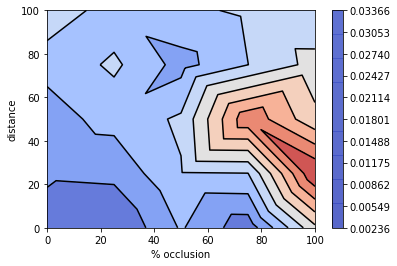

In [43]:
ax2 = plt.subplot()
ax2.tricontour(X_arr, Y_arr, Z_arr, levels=np.linspace(min(Z_arr), max(Z_arr), num=10, endpoint=True), linewidths=1.5, colors='k')
plot = ax2.tricontourf(X_arr, Y_arr, Z_arr, levels=np.linspace(min(Z_arr), max(Z_arr), num=10, endpoint=True), alpha = 0.85, cmap='coolwarm')#cmap='RdBu_r'
plt.xlabel('% occlusion')
plt.ylabel('distance')
#plt.clim(0.4,1.0)
cbar = plt.colorbar(plot)
cbar.set_clim(vmax=1.0)
cbar_ticks = np.linspace(min(Z_arr), max(Z_arr), num=11, endpoint=True)
cbar.set_ticks(cbar_ticks) 
#plt.colorbar(fraction=0.026, pad=0.04)

In [44]:
ax1 = plt.subplot()
# Create grid values first.
xi = np.linspace(0., 100., 40)
yi = np.linspace(0., 100., 40)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(X_arr, Y_arr)
#interpolator = tri.CubicTriInterpolator(triang, Z_arr)
#Xi, Yi = np.meshgrid(xi, yi)
#zi = interpolator(Xi, Yi)
from scipy.interpolate import griddata
zi = griddata((X_arr, Y_arr), Z_arr, (xi[None,:], yi[:,None]), method='cubic')
# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')


ax1.contour(xi, yi, zi, levels=np.linspace(min(Z_arr), max(Z_arr), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=np.linspace(min(Z_arr), max(Z_arr), num=10, endpoint=True), cmap="RdBu_r")

plt.xlabel('% occlusion')
plt.ylabel('distance')
#plt.clim(0.4,1.0)
cbar = plt.colorbar(cntr1)
cbar.set_clim(vmax=max(Z_arr))
cbar_ticks = np.linspace(min(Z_arr), max(Z_arr), num=11, endpoint=True)
cbar.set_ticks(cbar_ticks) 

<Figure size 432x288 with 0 Axes>

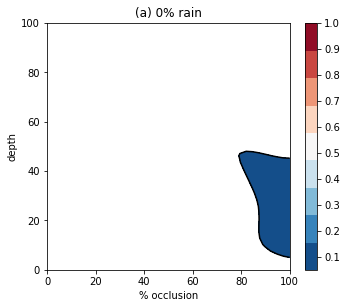

In [23]:
plt.subplots_adjust(bottom=2.5, right=None, top=3.5, wspace=None, hspace=0.2)
plt.tight_layout()
plt.figure(figsize=(25,10))



ax1 = plt.subplot(2,4,1)
ax1.contour(xi, yi, zi, levels=np.linspace(0.05, 1., num=10, endpoint=True), linewidths=1.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=np.linspace(0.05, 1., num=10, endpoint=True), cmap="RdBu_r")
ax1.set_title('(a) 0% rain')
plt.xlabel('% occlusion')
plt.ylabel('depth')
cbar = plt.colorbar(cntr1,ax= [ax1])
#cbar2 = plt.colorbar(cntr1,ax= [ax1,ax2,ax3,ax4,ax5,ax6 ])
cbar.set_clim(vmax=1.0)
cbar_ticks = np.linspace(0., 1., num=11, endpoint=True)
cbar.set_ticks(cbar_ticks) 

In [45]:
np.save('xi_MI8k', xi)
np.save('yi_MI8k', yi)
np.save('zi_MI8k', zi)